# Prophet extension

In [1]:
from ipynb.fs.defs.prophet import generateDistribution, Finv
import pandas as pd
import numpy as np
from tqdm import tqdm # for the progress bar
from statistics import mean
import matplotlib.pyplot as plt
import dataframe_image as dfi
from scipy.stats import ttest_ind

In [35]:
def FairGeneralProphetExtended(q, V, distribution_type, epsilon):
    s,n = 0.0, len(V)
    for i in range(0,n): #value < 1 reaches a drop!
        p = (1- (q[i]/2)/(epsilon-(s/2)))
        if V[i] >= Finv(distribution_type, p):
            return i
        s += q[i]

def FairIIDProphetExtended(V, distribution_type, epsilon):
    n = len(V)
    for i in range(0, n):
        p = 1 - (2/(3*n)) / (epsilon - 2*(i-1)/(3*n))
        if V[i] >= Finv(distribution_type, p):
                 return i
        
def runExperimentExtended(algorithm, N_experimentReps, distribution_type, n_candidates, epsilon):
    arrivalPositionsChosen, chosenValues, chosenValuesExcludeNone = [0]*n_candidates, [], []
    nones = 0
    for _ in tqdm(range(0, N_experimentReps)):
        q, Values = generateDistribution(distribution_type, n_candidates)
        
        if algorithm == "FairGeneralProphet":
                result = FairGeneralProphetExtended(q, Values, distribution_type, epsilon)
        elif algorithm == "FairIIDProphet":
                result = FairIIDProphetExtended(Values, distribution_type, epsilon)
        if result != None:
            arrivalPositionsChosen[result] += 1
            chosenValues.append(Values[result])
            chosenValuesExcludeNone.append(Values[result])
            
        if result == None: 
            chosenValues.append(0)
            nones += 1     
        
    noneRate = nones/N_experimentReps
        
    return noneRate, mean(chosenValues), mean(chosenValuesExcludeNone), arrivalPositionsChosen

def grid_search(algorithm, N_experimentReps, distribution_type,n_candidates, parameters):
    df = pd.DataFrame(columns=['epsilon', 'None rate', "Mean value (None=0)", "Mean value (excluding None)"])
    
    print(algorithm,distribution_type)
    for param in parameters:
        if algorithm == 'FairIIDProphet':
            param = round(param,1) # round epsilon in order to deal with float mistake in np.arange generation
        
        nonerate, avg_include, avg_exclude, chosen_positions = runExperimentExtended(algorithm=algorithm, 
                                                                                     N_experimentReps=N_experimentReps,
                                                                                     distribution_type=distribution_type, 
                                                                                     n_candidates=50, 
                                                                                     epsilon=param
                                                                                    )

        df = df.append(pd.Series([param,nonerate,avg_include,avg_exclude], index = df.columns), ignore_index=True)

        plt.plot(range(0,50), chosen_positions, label= str("γ = " + str(param)))
    plt.xlabel("Arrival position")
    plt.ylabel("Num Picked")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                    mode="expand", borderaxespad=0, ncol=2)
    plt.savefig("images/extensionFairPA_uniform.png")
    dfi.export(df, 'images/extensionFairPA_table_uniform.png')
    plt.show()
    return df


## Running experiments

FairGeneralProphet uniform


100%|████████████████████████████████████| 5000/5000 [00:00<00:00, 14503.98it/s]
[0202/181012.449509:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0202/181012.452133:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[0202/181012.454020:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0202/181013.210297:INFO:headless_shell.cc(653)] Written to file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/tmph_zok8a1/temp.png.


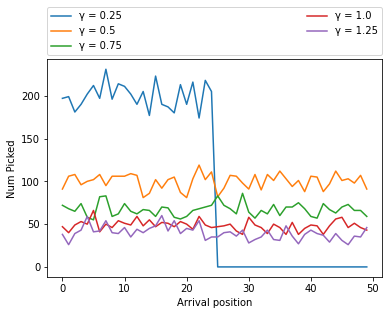

FairGeneralProphet binomial


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 440.99it/s]
[0202/181014.125628:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0202/181014.128030:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[0202/181014.128497:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0202/181014.847838:INFO:headless_shell.cc(653)] Written to file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/tmpeee3z064/temp.png.


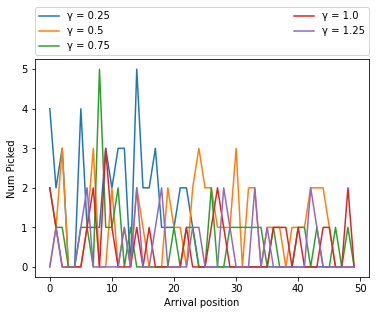

FairIIDProphet uniform


100%|████████████████████████████████████| 5000/5000 [00:00<00:00, 15101.69it/s]
[0202/181017.562880:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0202/181017.565344:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[0202/181017.565773:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0202/181018.293994:INFO:headless_shell.cc(653)] Written to file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/tmpc12qf9on/temp.png.


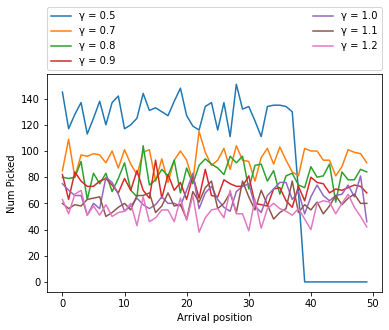

FairIIDProphet binomial


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 489.75it/s]
[0202/181019.416585:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0202/181019.419061:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[0202/181019.419589:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0202/181020.149075:INFO:headless_shell.cc(653)] Written to file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/tmpmw_x24lz/temp.png.


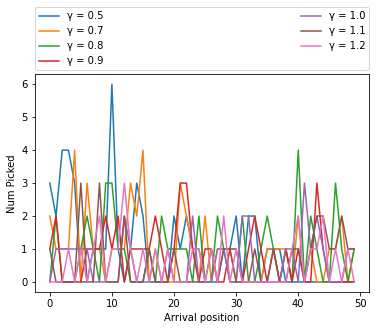

,epsilon,None rate,Mean value (None=0),Mean value (excluding None)
0,0.5,0.00,530.0,530.0
1,0.7,0.00,533.0,533.0
2,0.8,0.10,482.0,535.0
3,0.9,0.18,441.0,537.0
4,1.0,0.42,313.0,539.0
5,1.1,0.42,311.0,536.0
6,1.2,0.42,313.0,540.0


In [37]:
# Fair general prophet Uniform distribution
parameters_general_prophet = np.arange(0.25, 1.5, .25)

grid_search(algorithm='FairGeneralProphet',
            N_experimentReps = 5000,
            distribution_type = 'uniform',
            n_candidates = 50,
            parameters = parameters_general_prophet)

# Fair general prophet Binomial distribution
grid_search(algorithm='FairGeneralProphet',
            N_experimentReps = 50,
            distribution_type = 'binomial',
            n_candidates = 1000,
            parameters = parameters_general_prophet)


# Fair IID prophet Uniform distribution
parameters_fair_iid = np.arange(0.5, 1.3, 0.10)
## For clarity in the plots, we epsilon values 0.6, 0.8, or 1.1 from the grid search results
excluded_parameters = np.isin(parameters_fair_iid, [0.6, 0.8, 1.1], invert=True)
parameters_fair_iid = parameters_fair_iid[excluded_parameters]

# Fair IID prophet Uniform distribution
grid_search(algorithm='FairIIDProphet',
            N_experimentReps = 5000,
            distribution_type = 'uniform',
            n_candidates = 50,
            parameters = parameters_fair_iid)

# Fair IID prophet Binomial distribution
grid_search(algorithm='FairIIDProphet',
            N_experimentReps = 50,
            distribution_type = 'binomial',
            n_candidates = 1000,
            parameters = parameters_fair_iid)

## Running the significance test for the extension, uniform distribution

_Output is two lists of 10x the avgInclude for the two groups. Group 1 is PaperValue, Group 2 is ourExtensionValue, for both FairProphet and FairIID._

In [ ]:
FairProphetPA_PaperValue, FairProphetPA_ExtensionValue = [], []
FairProphetIID_PaperValue, FairProphetIID_ExtensionValue = [], []

FairProphetPA_PaperValue_exclude, FairProphetPA_ExtensionValue_exclude = [], []
FairProphetIID_PaperValue_exclude, FairProphetIID_ExtensionValue_exclude = [], []

FairProphetPA_PaperParameter = 1
FairProphetIID_PaperParameter = 1
FairProphetPA_ExtensionParameter = .5
FairProphetIID_ExtensionParameter = .7

for i in range(0, 10):
    _, avg_include, avg_exclude, _ = runExperimentExtended(algorithm="FairGeneralProphet", 
                                                                                     N_experimentReps=50000,
                                                                                     distribution_type="uniform", 
                                                                                     n_candidates=50, 
                                                                                     epsilon=FairProphetPA_PaperParameter
                                                                                    )
    FairProphetPA_PaperValue.append(avg_include)
    FairProphetPA_PaperValue_exclude.append(avg_exclude)
    
    _, avg_include, avg_exclude, _ = runExperimentExtended(algorithm="FairGeneralProphet", 
                                                                                     N_experimentReps=50000,
                                                                                     distribution_type="uniform", 
                                                                                     n_candidates=50, 
                                                                                     epsilon=FairProphetPA_ExtensionParameter
                                                                                    )
    FairProphetPA_ExtensionValue.append(avg_include)
    FairProphetPA_ExtensionValue_exclude.append(avg_exclude)
    
    
for i in range(0, 10):
    _, avg_include, avg_exclude, _ = runExperimentExtended(algorithm="FairIIDProphet", 
                                                                                     N_experimentReps=50000,
                                                                                     distribution_type="uniform", 
                                                                                     n_candidates=50, 
                                                                                     epsilon=FairProphetIID_PaperParameter
                                                                                    )
    FairProphetIID_PaperValue.append(avg_include)
    FairProphetIID_PaperValue_exclude.append(avg_exclude)
    
    _, avg_include, avg_exclude, _ = runExperimentExtended(algorithm="FairIIDProphet", 
                                                                                     N_experimentReps=50000,
                                                                                     distribution_type="uniform", 
                                                                                     n_candidates=50, 
                                                                                     epsilon=FairProphetIID_ExtensionParameter
                                                                                    )
    FairProphetIID_ExtensionValue.append(avg_include)
    FairProphetIID_ExtensionValue_exclude.append(avg_exclude)

In [ ]:
print(ttest_ind(FairProphetPA_PaperValue, FairProphetPA_ExtensionValue))
print(ttest_ind(FairProphetIID_PaperValue, FairProphetIID_ExtensionValue))

In [ ]:
print(ttest_ind(FairProphetPA_PaperValue_exclude, FairProphetPA_ExtensionValue_exclude))
print(ttest_ind(FairProphetIID_PaperValue_exclude, FairProphetIID_ExtensionValue_exclude))